# PCA and Horn's Parallel Analysis Lab

In this lab you'll practice using PCA on two datasets: heptathalon performance 
Horn's Parallel Analysis is a way to determine how many components you should keep after using a PCA on your data. Essentially it will tell you which of your components are likely noise which can be discarded.

---

### Load packages and heptathalon data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
hep = pd.read_csv('heptathlon.csv')

In [3]:
hep.columns[1:]

Index([u'hurdles', u'highjump', u'shot', u'run200m', u'longjump', u'javelin',
       u'run800m', u'score'],
      dtype='object')

In [4]:
hep.columns = ['athlete'] + hep.columns[1:].tolist()

In [5]:
hep.head(3)

,athlete,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858


In [6]:
hep.iloc[:,1:].corr()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
hurdles,1.000000,-0.811403,-0.651335,0.773721,-0.912134,-0.007763,0.779257,-0.923198
highjump,-0.811403,1.000000,0.440786,-0.487664,0.782442,0.002153,-0.591163,0.767359
shot,-0.651335,0.440786,1.000000,-0.682670,0.743073,0.268989,-0.419620,0.799699
run200m,0.773721,-0.487664,-0.682670,1.000000,-0.817205,-0.333043,0.616810,-0.864883
longjump,-0.912134,0.782442,0.743073,-0.817205,1.000000,0.067108,-0.699511,0.950437
javelin,-0.007763,0.002153,0.268989,-0.333043,0.067108,1.000000,0.020049,0.253147
run800m,0.779257,-0.591163,-0.419620,0.616810,-0.699511,0.020049,1.000000,-0.772776
score,-0.923198,0.767359,0.799699,-0.864883,0.950437,0.253147,-0.772776,1.000000


In [7]:
from sklearn.decomposition import PCA

In [8]:
from sklearn.preprocessing import StandardScaler
hep_n = StandardScaler().fit_transform(hep.iloc[:,1:-1])
hep_n[:,[0,3,6]] *= -1


In [9]:
pca = PCA().fit(hep_n)

In [10]:
pca.components_

array([[-0.45287105, -0.37719923, -0.3630725 , -0.40789504, -0.45623185,
        -0.075409  , -0.37495938],
       [-0.15792058, -0.24807386,  0.28940743,  0.26038545, -0.05587394,
         0.84169212, -0.22448984],
       [ 0.04514996,  0.36777902, -0.67618919, -0.08359211, -0.13931653,
         0.47156016,  0.39585671],
       [ 0.02653873,  0.67999172,  0.12431725, -0.3610658 ,  0.11129249,
         0.12079924, -0.6034113 ],
       [ 0.09494792, -0.01879888, -0.51165201,  0.64983404,  0.1842981 ,
        -0.13510669, -0.50432116],
       [ 0.78334101, -0.09939981,  0.05085983, -0.02495639, -0.59020972,
         0.02724076, -0.1555552 ],
       [ 0.38024707, -0.43393114, -0.21762491, -0.45338483,  0.61206388,
         0.17294667, -0.09830963]])

In [11]:
pca1_evec = pca.components_[0]
for weight, event in zip(pca1_evec, hep.iloc[:,1:-1].columns):
    print event, weight

hurdles -0.452871046493
highjump -0.377199230356
shot -0.363072497179
run200m -0.407895041255
longjump -0.456231849776
javelin -0.0754089953116
run800m -0.374959378673


In [12]:
pca2_evec = pca.components_[2]
for weight, event in zip(pca2_evec, hep.iloc[:,1:-1].columns):
    print event, weight

hurdles 0.0451499646706
highjump 0.367779024656
shot -0.676189188799
run200m -0.0835921094786
longjump -0.139316525161
javelin 0.471560156559
run800m 0.395856709505


---

### Create dataframe excluding athlete and score

In [18]:
hep.head(5)

,athlete,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [21]:
df = hep.drop(['athlete','score'], axis = 1)

---

### Examine the correlation between the different events

Plot a heatmap if you want to get fancy. What does the correlation matrix tell you?

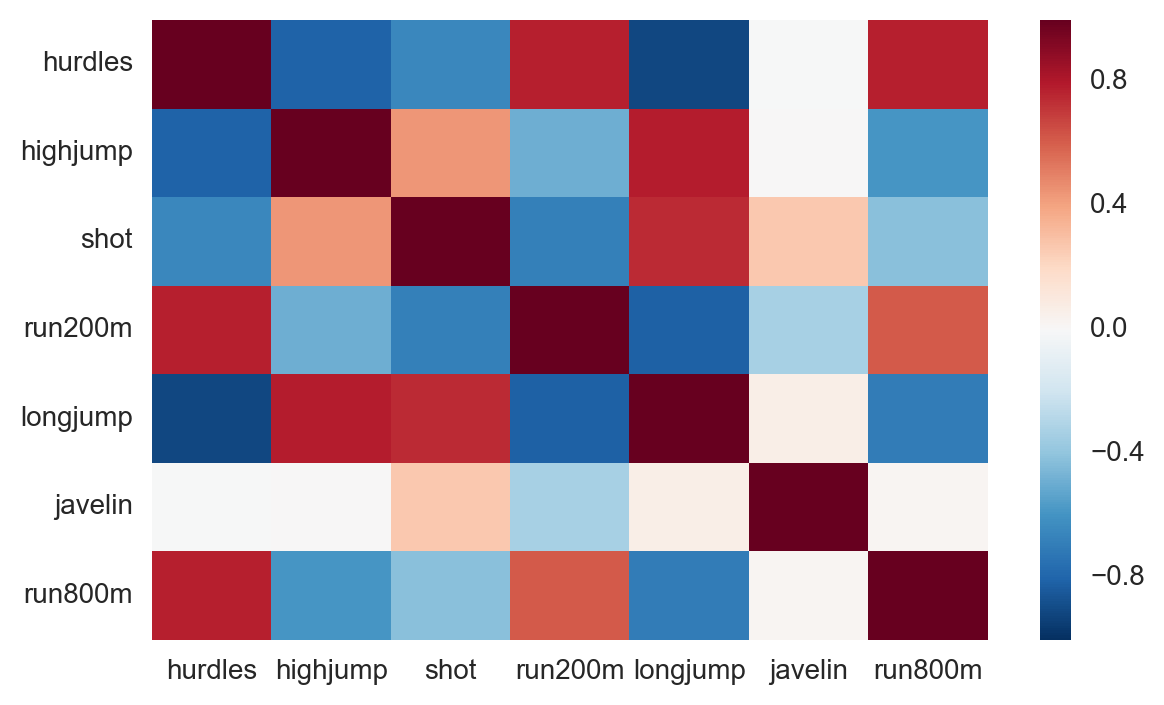

In [24]:
sns.heatmap(df.corr())

---

### Standardize the data

In [34]:
from sklearn.preprocessing import StandardScaler

df_n = StandardScaler().fit_transform(df)

---

### Fit a PCA on the standardized data using sklearn

In [35]:
hep_pca = PCA()
hep_pca.fit(df_n)
stats_pcs = hep_pca.transform(df_n)

In [36]:
stats_pcs

array([[ -4.20643487e+00,   1.26802363e+00,  -3.77540969e-01,
          2.34760555e-02,   4.34790795e-01,  -3.46326436e-01,
          3.55095715e-01],
       [ -2.94161870e+00,   5.34525607e-01,  -9.15920066e-01,
         -4.85255922e-01,  -7.17563613e-01,   2.42996831e-01,
          1.46985484e-01],
       [ -2.70427114e+00,   6.92759007e-01,   4.68645234e-01,
         -6.93643036e-01,   1.07701186e-01,  -2.44122993e-01,
         -1.32321187e-01],
       [ -1.37105209e+00,   7.06558619e-01,  -6.07545350e-01,
         -1.43571252e-01,  -4.63288490e-01,   9.36987374e-02,
         -4.96611559e-01],
       [ -1.38704979e+00,   1.78931718e+00,   1.53808834e-01,
         -8.53187909e-01,  -7.01365286e-01,   1.28908447e-01,
          2.44420338e-01],
       [ -1.06537236e+00,  -8.10446879e-02,   6.88439798e-01,
         -2.09811585e-01,  -7.53150239e-01,  -3.63126022e-01,
         -1.05546792e-01],
       [ -1.12307639e+00,  -3.30429058e-01,   7.49458898e-02,
         -4.96305896e-01,   7.78

---

### Create a DataFrame with the principal components

Add back in the athelete and score columns from the original data.

In [42]:
hep.iloc[:,0]

0     Joyner-Kersee (USA)
1              John (GDR)
2            Behmer (GDR)
3      Sablovskaite (URS)
4       Choubenkova (URS)
5            Schulz (GDR)
6           Fleming (AUS)
7           Greiner (USA)
8        Lajbnerova (CZE)
9           Bouraga (URS)
10          Wijnsma (HOL)
11        Dimitrova (BUL)
12         Scheider (SWI)
13            Braun (FRG)
14     Ruotsalainen (FIN)
15           Yuping (CHN)
16            Hagger (GB)
17            Brown (USA)
18          Mulliner (GB)
19       Hautenauve (BEL)
20           Kytola (FIN)
21         Geremias (BRA)
22          Hui-Ing (TAI)
23         Jeong-Mi (KOR)
24            Launa (PNG)
Name: athlete, dtype: object

In [72]:
stats_pcs = pd.DataFrame(stats_pcs, columns=['PC'+str(i) for i in range(1,8)])
stats_pcs['athlete'] = hep.iloc[:,0]
stats_pcs['score'] = hep.score

stats_pcs.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,athlete,score
0,-4.206435,1.268024,-0.377541,0.023476,0.434791,-0.346326,0.355096,Joyner-Kersee (USA),7291
1,-2.941619,0.534526,-0.915920,-0.485256,-0.717564,0.242997,0.146985,John (GDR),6897
2,-2.704271,0.692759,0.468645,-0.693643,0.107701,-0.244123,-0.132321,Behmer (GDR),6858
3,-1.371052,0.706559,-0.607545,-0.143571,-0.463288,0.093699,-0.496612,Sablovskaite (URS),6540
4,-1.387050,1.789317,0.153809,-0.853188,-0.701365,0.128908,0.244420,Choubenkova (URS),6540


In [73]:
hep_pca.components_

array([[ 0.45287105, -0.37719923, -0.3630725 ,  0.40789504, -0.45623185,
        -0.075409  ,  0.37495938],
       [ 0.15792058, -0.24807386,  0.28940743, -0.26038545, -0.05587394,
         0.84169212,  0.22448984],
       [-0.04514996,  0.36777902, -0.67618919,  0.08359211, -0.13931653,
         0.47156016, -0.39585671],
       [-0.02653873,  0.67999172,  0.12431725,  0.3610658 ,  0.11129249,
         0.12079924,  0.6034113 ],
       [-0.09494792, -0.01879888, -0.51165201, -0.64983404,  0.1842981 ,
        -0.13510669,  0.50432116],
       [-0.78334101, -0.09939981,  0.05085983,  0.02495639, -0.59020972,
         0.02724076,  0.1555552 ],
       [-0.38024707, -0.43393114, -0.21762491,  0.45338483,  0.61206388,
         0.17294667,  0.09830963]])

---

### Plot the variance explained (ratio) of your components

Explain what this chart tells you about your components.

In [74]:
print hep_pca.explained_variance_ratio_

[ 0.63718217  0.17061722  0.07443059  0.06530955  0.03503811  0.01042223
  0.00700014]


In [75]:
stats_pcs.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,athlete,score
0,-4.206435,1.268024,-0.377541,0.023476,0.434791,-0.346326,0.355096,Joyner-Kersee (USA),7291
1,-2.941619,0.534526,-0.915920,-0.485256,-0.717564,0.242997,0.146985,John (GDR),6897
2,-2.704271,0.692759,0.468645,-0.693643,0.107701,-0.244123,-0.132321,Behmer (GDR),6858
3,-1.371052,0.706559,-0.607545,-0.143571,-0.463288,0.093699,-0.496612,Sablovskaite (URS),6540
4,-1.387050,1.789317,0.153809,-0.853188,-0.701365,0.128908,0.244420,Choubenkova (URS),6540


In [1]:
stats_pcs.shape

NameError: name 'stats_pcs' is not defined

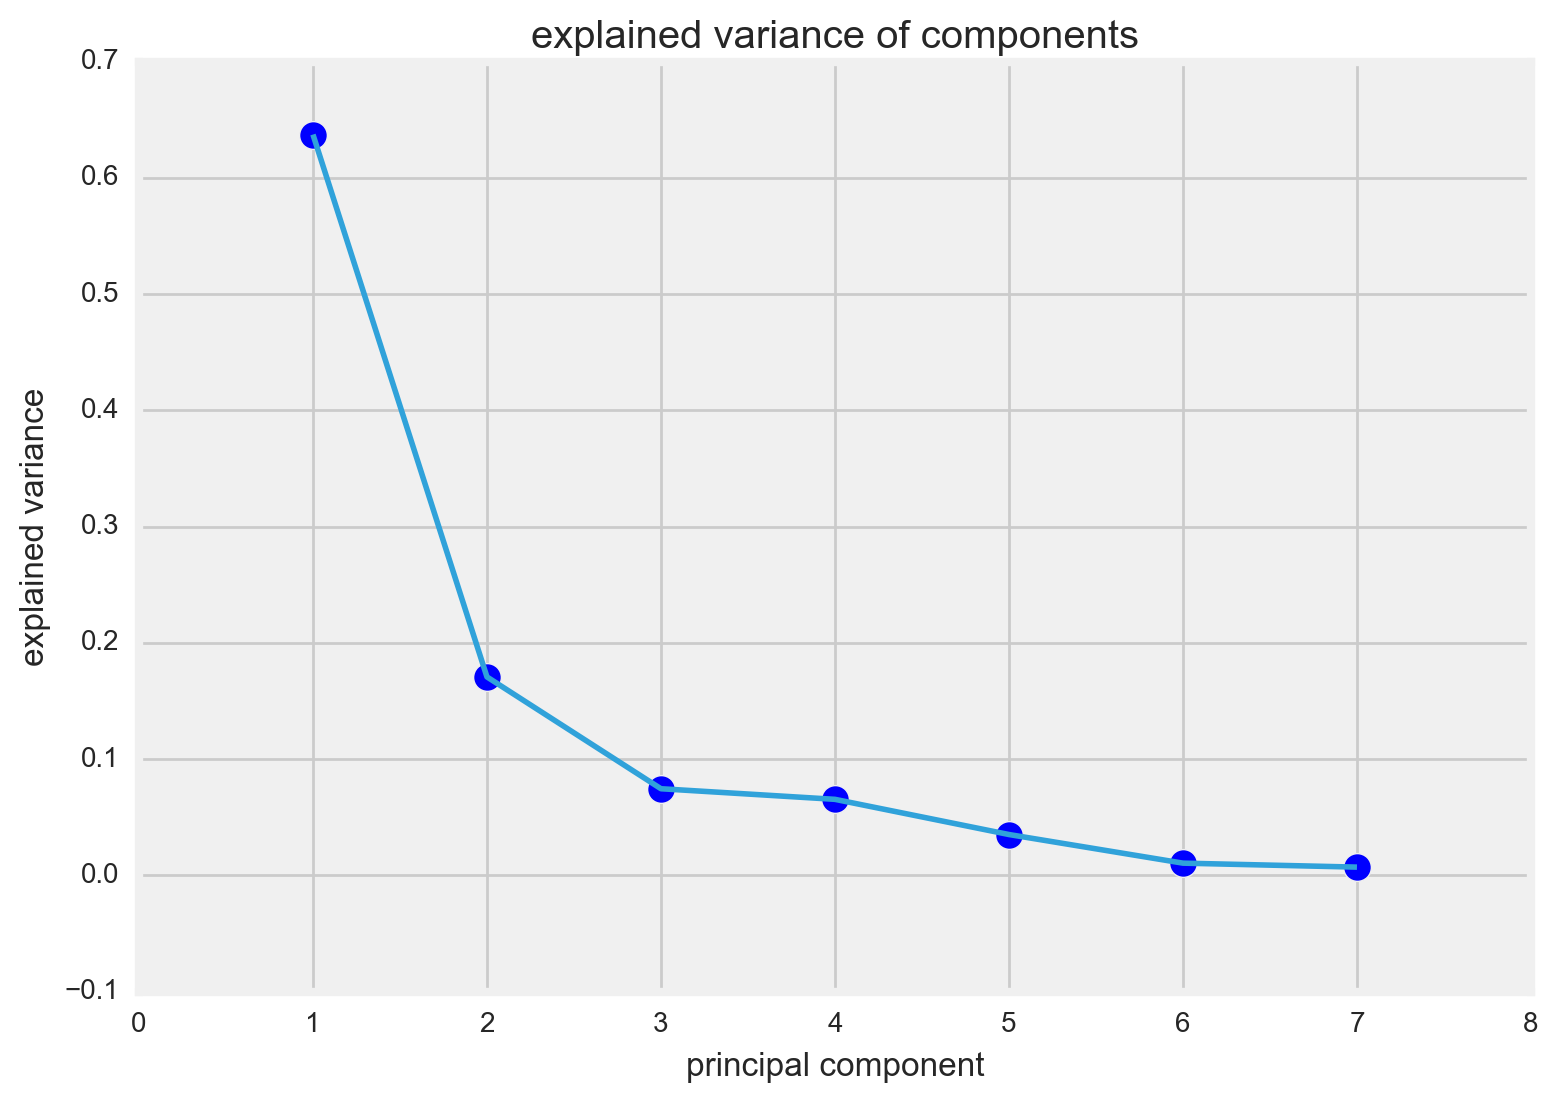

In [77]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, df.shape[1]+1), hep_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, df.shape[1]+1), hep_pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

---

### Print out the weights/eigenvectors (.components_ ) with their corresponding variables for PC1 and PC2

Based on how the original variables are weighted to calculate the components, how would you describe PC1 and PC2?

In [78]:
for col, comp in zip(df.columns, hep_pca.components_[0]):
    print col, comp

hurdles 0.452871046493
highjump -0.377199230356
shot -0.363072497179
run200m 0.407895041255
longjump -0.456231849776
javelin -0.0754089953116
run800m 0.374959378673


In [79]:
for col, comp in zip(df.columns, hep_pca.components_[1]):
    print col, comp

hurdles 0.15792058051
highjump -0.248073860443
shot 0.289407432672
run200m -0.260385452677
longjump -0.0558739391465
javelin 0.841692115096
run800m 0.22448984448


In [80]:
stats_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,athlete,score
0,-4.206435,1.268024,-0.377541,0.023476,0.434791,-0.346326,0.355096,Joyner-Kersee (USA),7291
1,-2.941619,0.534526,-0.915920,-0.485256,-0.717564,0.242997,0.146985,John (GDR),6897
2,-2.704271,0.692759,0.468645,-0.693643,0.107701,-0.244123,-0.132321,Behmer (GDR),6858
3,-1.371052,0.706559,-0.607545,-0.143571,-0.463288,0.093699,-0.496612,Sablovskaite (URS),6540
4,-1.387050,1.789317,0.153809,-0.853188,-0.701365,0.128908,0.244420,Choubenkova (URS),6540


---

### Plot PC1 vs. PC2. Which athletes are notable on each component?

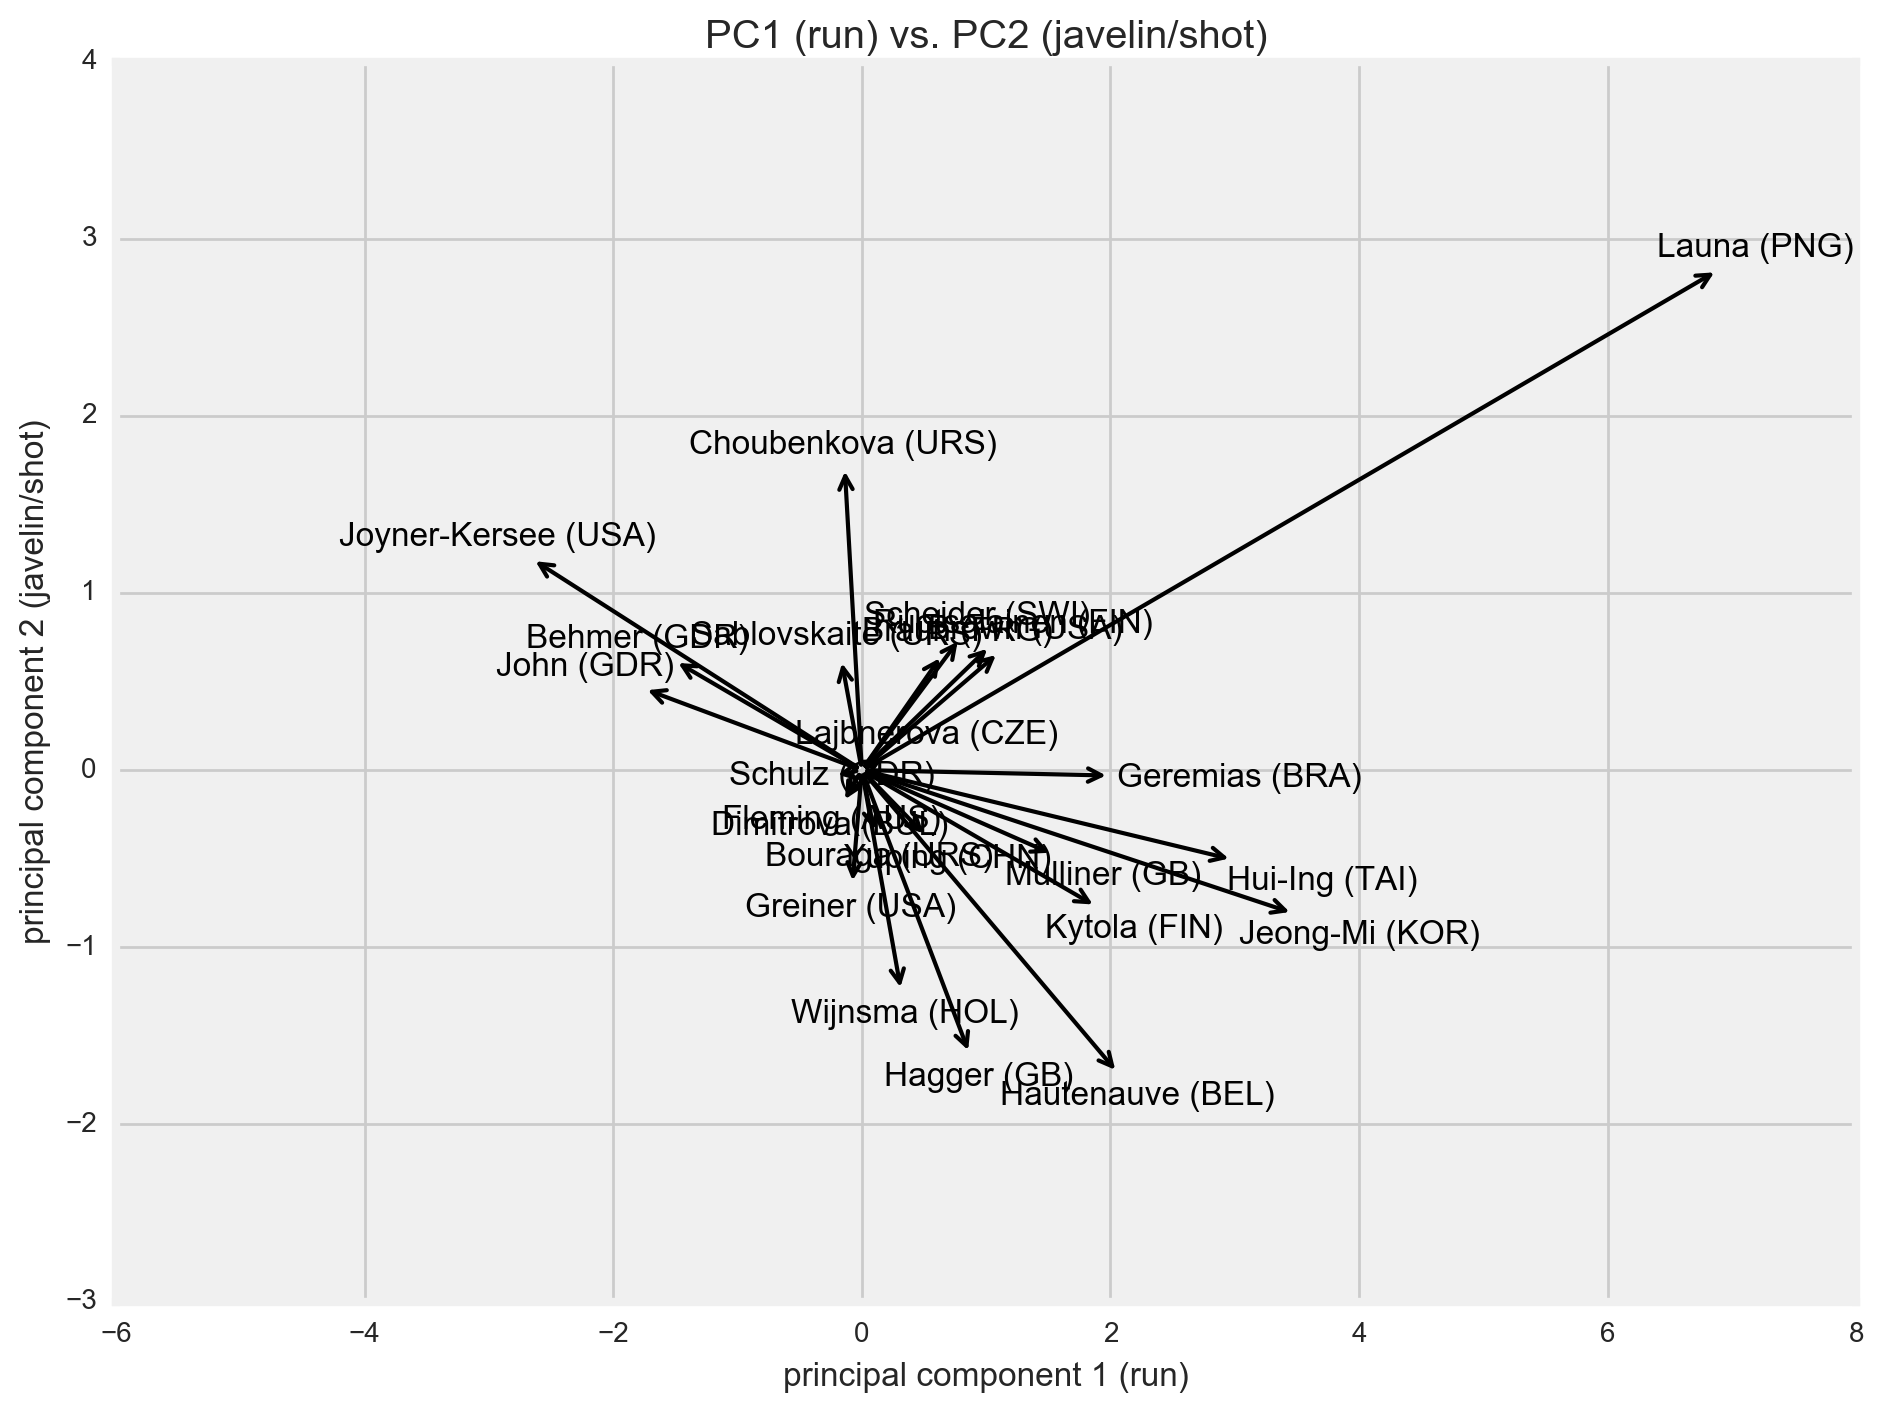

In [81]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(stats_pcs.PC1.values, stats_pcs.PC2.values, s=0)

for i, txt in enumerate(stats_pcs.athlete.values):
    ax.annotate(txt, (0, 0), (stats_pcs.PC1.values[i], stats_pcs.PC2.values[i]),
            arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.5),
            xycoords='data', textcoords='data', fontsize=12, color="black")

ax.set_title('PC1 (run) vs. PC2 (javelin/shot)')
ax.set_xlabel('principal component 1 (run)')
ax.set_ylabel('principal component 2 (javelin/shot)')
plt.show()

---

### Plot PC1 vs. score and PC2 vs. score. What does this tell you about the relationship between the events and the score?

In [82]:
stats_pcs.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,athlete,score
0,-4.206435,1.268024,-0.377541,0.023476,0.434791,-0.346326,0.355096,Joyner-Kersee (USA),7291
1,-2.941619,0.534526,-0.915920,-0.485256,-0.717564,0.242997,0.146985,John (GDR),6897
2,-2.704271,0.692759,0.468645,-0.693643,0.107701,-0.244123,-0.132321,Behmer (GDR),6858
3,-1.371052,0.706559,-0.607545,-0.143571,-0.463288,0.093699,-0.496612,Sablovskaite (URS),6540
4,-1.387050,1.789317,0.153809,-0.853188,-0.701365,0.128908,0.244420,Choubenkova (URS),6540


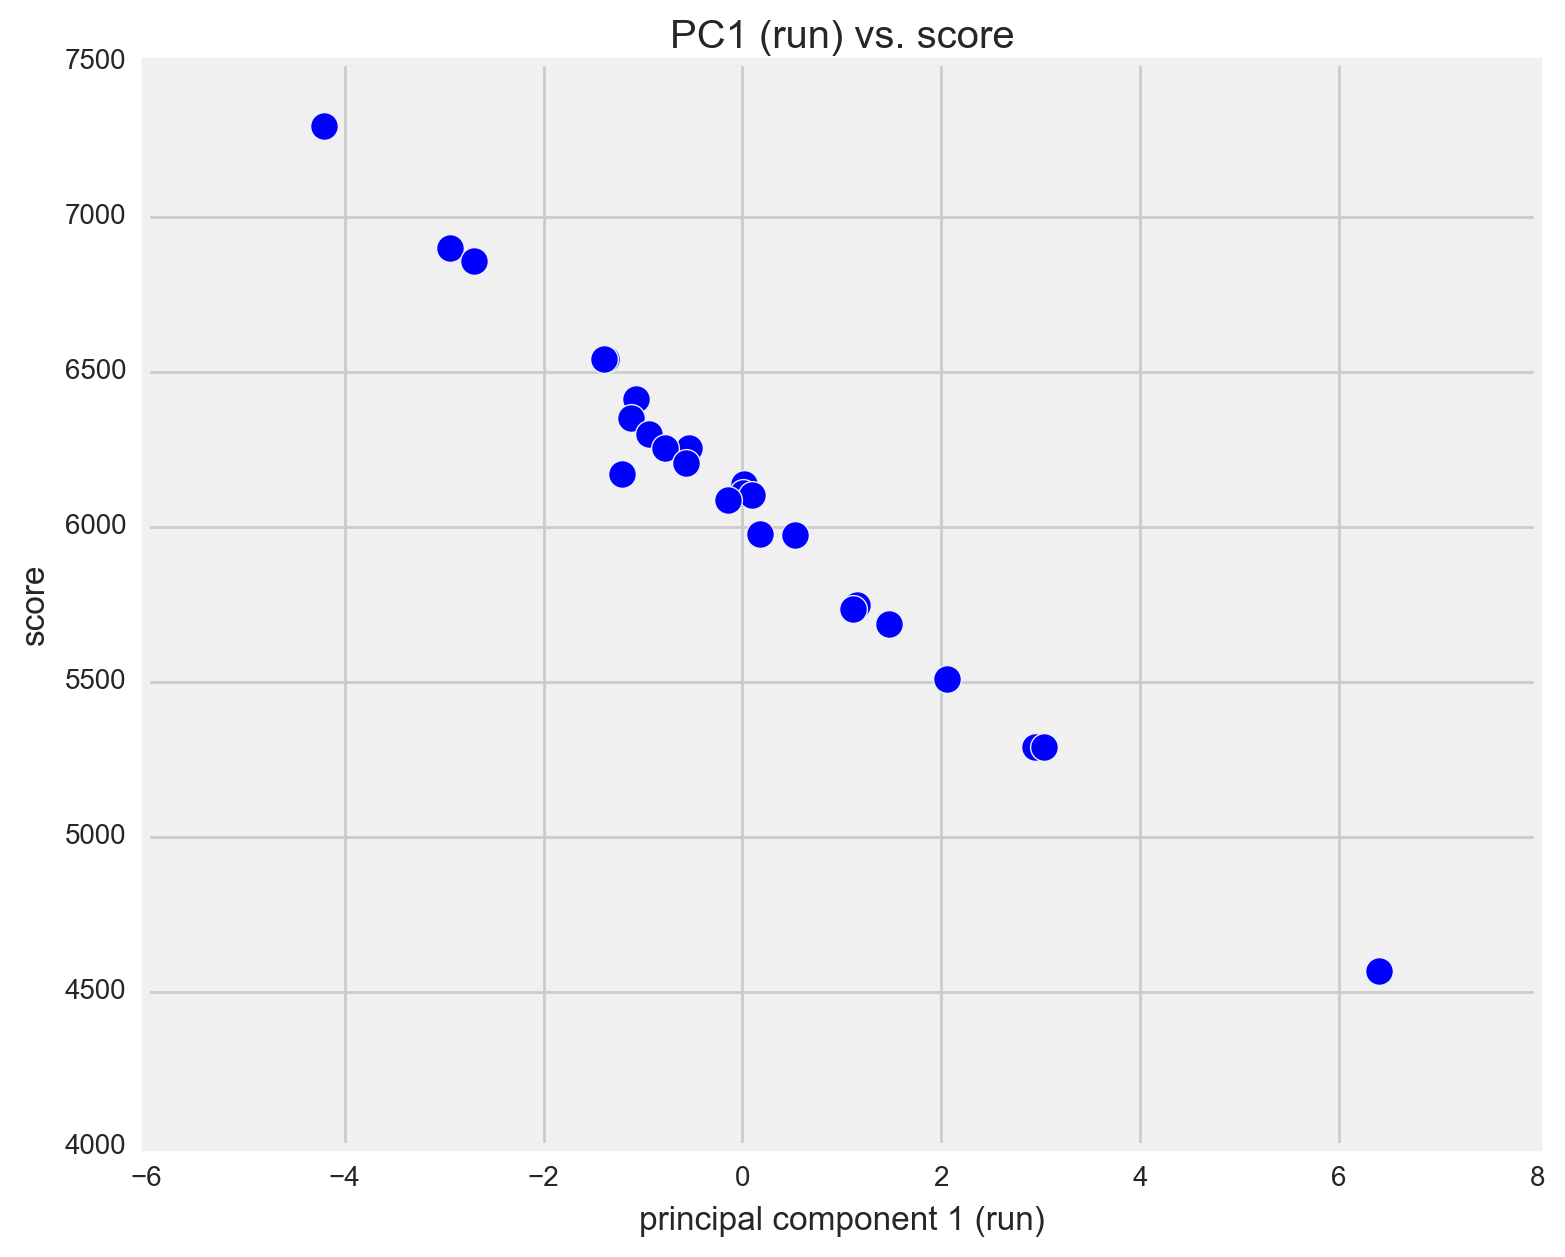

In [84]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(stats_pcs.PC1, stats_pcs.score, s=100)

ax.set_title('PC1 (run) vs. score')
ax.set_xlabel('principal component 1 (run)')
ax.set_ylabel('score')
plt.show()

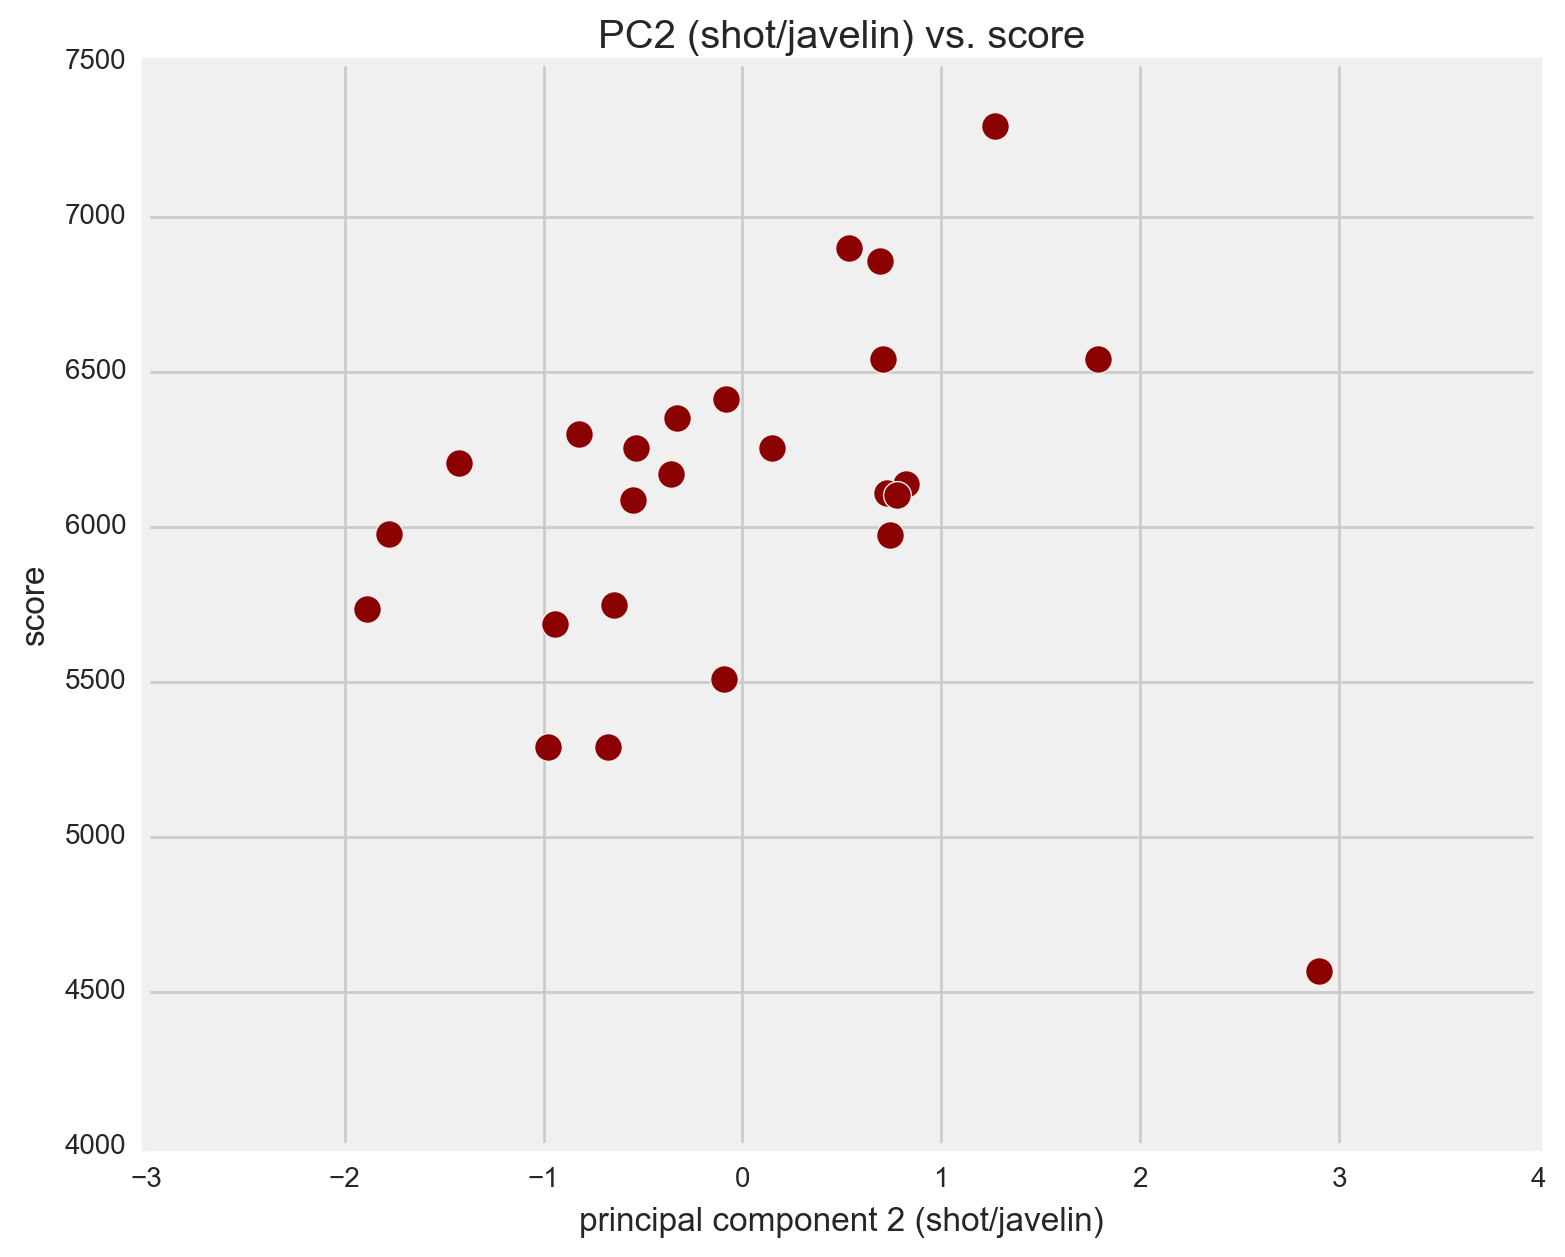

In [85]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(stats_pcs.PC2, stats_pcs.score, s=100, c='darkred')

ax.set_title('PC2 (shot/javelin) vs. score')
ax.set_xlabel('principal component 2 (shot/javelin)')
ax.set_ylabel('score')
plt.show()

---

### Horn's parallel analysis

You can determine the appropriate number of components to keep by using a bootstrapping procedure known as Horn's Parallel Analysis. This is (as far as I know) the gold standard in determining which components aren't noise.

How to do the parallel analysis (pseudocode):

    for n iterations:
        create normally distributed random data the same shape as your data
        fit a PCA on the random data
        pull out the eigenvalues
    select a percentile of the eigenvalues as your threshold (0.5 = median, 0.95 = 95% confidence, etc.)
    plot the random component eigenvalues at that percentile against your data's pca eigenvalues
    components above the selected percentile are not noise, those under are
    
    
Write a function to perform the parallel analysis.

In [86]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

---

### Run parallel analysis for the data

In [87]:
hep_pa = horn_parallel_analysis(hep.iloc[:,1:-1].shape, percentile=95)

---

### Plot the heptatholon eigenvalues (`.variance_explained_`) against the parallel analysis random eigenvalue cutoffs

How many components are not noise, based on the chart?

In [89]:
hep_pa

array([ 2.37776969,  1.74538522,  1.38947465,  1.09705277,  0.83671574,
        0.62457331,  0.427301  ])

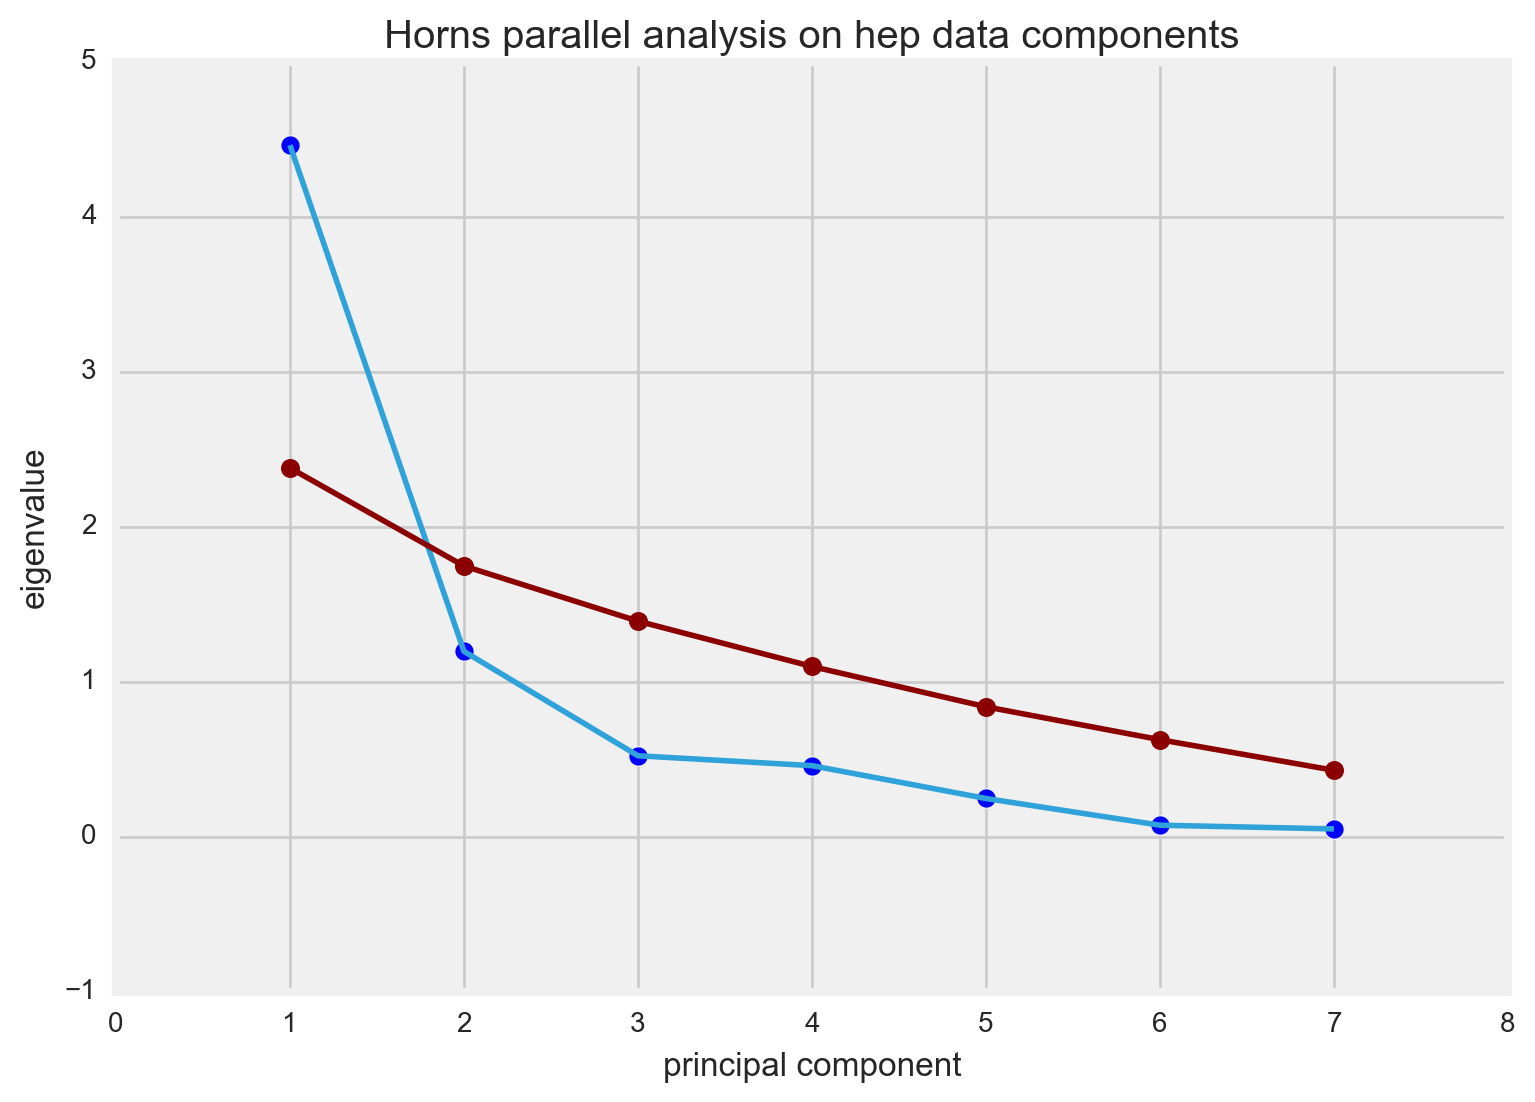

In [88]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, hep.iloc[:,1:-1].shape[1]+1), hep_pca.explained_variance_, lw=2)
ax.scatter(range(1, hep.iloc[:,1:-1].shape[1]+1), hep_pca.explained_variance_, s=50)

ax.plot(range(1, len(hep_pa)+1), hep_pa, lw=2, color='darkred')
ax.scatter(range(1, len(hep_pa)+1), hep_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on hep data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()